# 과제 : K-means와 DBSCAN 비교


아래 데이터셋을 활용하여 클러스터링을 하려고 합니다.
코드의 빈칸을 채우시고, 주관식 문제에 답해주세요.

## 데이터셋 불러오기 및 시각화

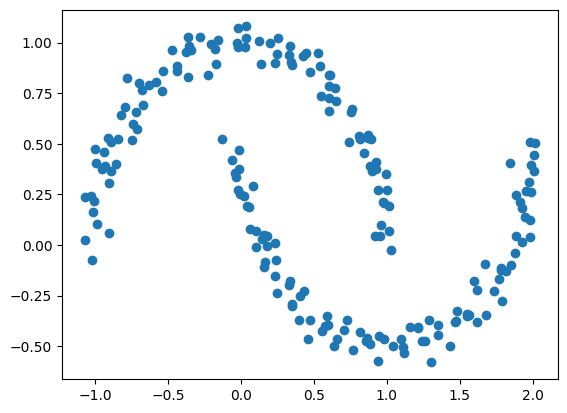

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

x, y = make_moons(n_samples = 200, shuffle = True, noise = 0.05, random_state = 0)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

km = KMeans(n_clusters = 2, random_state = 0)
pred1 = km.fit_predict(x)

## K-means 클러스터링

### Elbow method

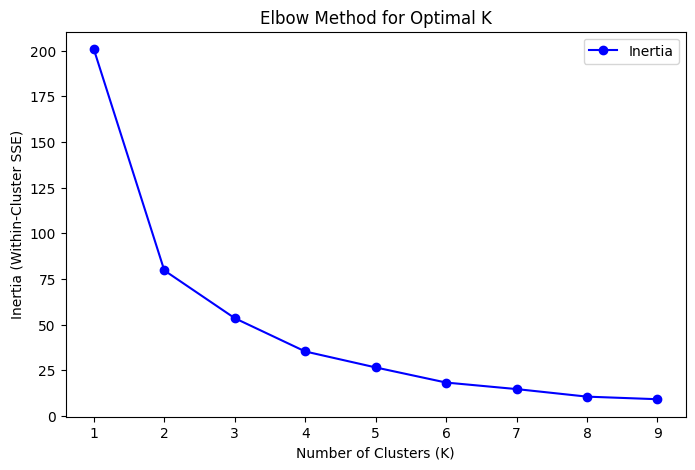

In [2]:
# 엘보우 메소드 시각화
inertia_values = []
silhouette_values = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(x)
    inertia_values.append(km.inertia_)

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(K_range, inertia_values, marker='o', linestyle='-', color='blue', label="Inertia")
ax1.set_xlabel("Number of Clusters (K)")
ax1.set_ylabel("Inertia (Within-Cluster SSE)")
ax1.set_title("Elbow Method for Optimal K")
ax1.legend()
plt.show()

### 문제 1
**엘보우 메소드를 바탕으로, 최적의 K값을 설정하여 코드의 빈칸을 채운 후, 판단 근거를 서술하세요.**

In [3]:
# 3️⃣ 최적의 K값 선택 (엘보우 지점)
optimal_k = 2  # 엘보우 메소드에서 꺾이는 지점을 선택

### 결과

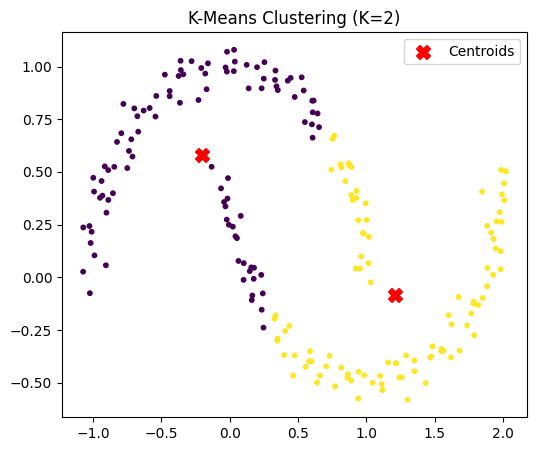

In [4]:
# K-Means 클러스터링 실행
km = KMeans(n_clusters=optimal_k, random_state=0)
pred_kmeans = km.fit_predict(x)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=pred_kmeans, cmap='viridis', s=10)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='X', s=100, label="Centroids")
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.legend()
plt.show()


## DBSACN

### 문제 2
**eps와 min_samlpes의 개념을 이해한 후, 이 둘을 조절하여 실행해보며 아래 사진과 같은 군집을 형성하세요.**

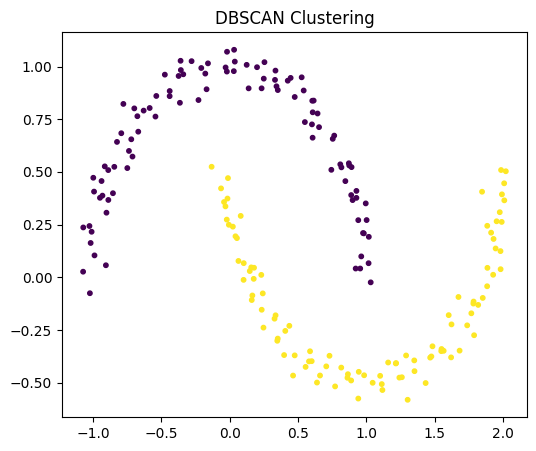

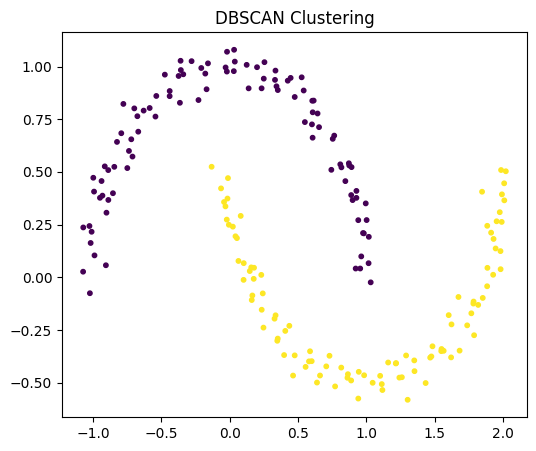

In [21]:
# DBSCAN 클러스터링 실행
eps_value = 0.3
min_samples_value = 1
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
pred_dbscan = dbscan.fit_predict(x)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=pred_dbscan, cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.show()


### 문제 3
**eps와 min_samples가 너무 크거나 작을 때, 왜 상식적인 군집화가 이루어지지 않았을까요?**

eps는 두 데이터 포인트가 같은 클러스터에 속하기 위해 가져야 하는 최대 거리로 너무 크다면 하나 혹은 소수의 클러스터가 생성되며, 너무 작다면 너무 많은 클러스터가 생성된다  
min_samples은 하나의 클러스터를 형성하기 위해 필요한 최소 데이터의 수를 의미하는데 너무 크다면 클러스터가 형성되지 않으며, 너무 작다면 너무 많은 클러스터가 형성되게 된다  

### 문제 4
**K-means의 결과와, DBSCAN의 결과가 다른 이유를 특징을 포함하여 서술하세요.**


K-means는 여러 데이터의 중심 거리를 설정하여 클러스터를 형성하므로 구형, 원형의 클러스터를 가정하지만 DBSCAN은 밀도기반이므로 여러 모양의 클러스터가 생성될 수 있으며, K-means는 초기 클러스터 수를 사전에 지정하지만, DBSCAM은 자동적으로 클러스터 수가 결정되기 때문에 결과가 다르게 나올 수 있다   